In [1]:
# naimportovanie knižnice pandas ako akronym pd   
# pandas -> používa sa hlavne na analýzu dát, umožňuje importovať dáta z rôznych formátov ako napr. csv, excel, JSON, SQL, ...
import pandas as pd

# naimportovanie knižnice numby ako akronym np    
# numpy ->  používa sa pre prácu poľami, maticami, ...
import numpy as np

# naimportovanie knižnice matplotlib.pyplot ako akronym plt
# matplotlib.pyplot -> používa sa na vizualizáciu dát
import matplotlib.pyplot as plt

# naimportovanie knižnice seaborn ako akronym sns
# seaborn -> používa sa na vizualizáciu dát
import seaborn as sns

# naimportovanie python knižnice keras pre tvorbu neuŕonových sietí
import keras
#from keras.utils import np_utils
#from keras.utils import to_categorical

# Sekvenčný model je lineárny stoh vrstiev, každá vrstva má jeden vstupný a výstupný tenzor
from keras.models import Sequential

# Vrstva, kde každý neurón vo vrstve prijíma vstup zo všetkých neurónov prítomných v predchádzajúcej vrstve
from keras.layers import Dense 

# model pre rozdelenie dát na podmnožiny testovacích a trénovacích dát
from sklearn.model_selection import train_test_split

# model na vizualizáciu neurónovej siete
from keras.utils.vis_utils import plot_model 

In [2]:
# uloženie datasetu do premennej dataset, s príznakom sep=";" (dáta sú oddelené znakom ;)
dataset = pd.read_csv('cardiovascular_diseases_dv3.csv',sep=";")

In [3]:
# zobrazenie datasetu aby sme sa ujistili či je všetko v poriadku
dataset

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,52,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,48,1,156,56,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
68778,53,2,168,76,120,80,1,1,1,0,1,0
68779,62,1,158,126,140,90,2,2,0,0,1,1
68780,52,2,183,105,180,90,3,1,0,1,0,1
68781,61,1,163,72,135,80,1,2,0,0,0,1


In [4]:
# Predtým než začneme prácu s datasetom, ujistíme sa či stĺpce nemajú prázne hodnoty, aby sme sa vyhli nesprávnym výsledkom.
dataset.isnull().sum()

AGE                  0
GENDER               0
HEIGHT               0
WEIGHT               0
AP_HIGH              0
AP_LOW               0
CHOLESTEROL          0
GLUCOSE              0
SMOKE                0
ALCOHOL              0
PHYSICAL_ACTIVITY    0
CARDIO_DISEASE       0
dtype: int64

In [5]:
# funkcia pre stručné informatívne zhrnutie datasetu
dataset.info()
# dataset obsahuje 12 stĺpcov so 68783 záznamami, čo sa týka významu stĺpcov:
# AGE (vek)                                 --> vek pacienta
# GENDER (pohlavie)                         --> pohlavie pacienta: 1 - žena, 2 - muž        
# HEIGHT (výška)                            --> výška pacienta v centimetroch
# WEIGHT (váha)                             --> váha pacienta v kilogramoch                     
# AP_HIGH (horný krvný tlak)                --> horný krvný tlak (meraný pri sťahovaní srdca)   # 120 #
# AP_LOW (dolný krvný tlak)                 --> dolný krvný tlak (meraný pri ovoľnení srdca)    #  80 #
# CHOLESTEROL (cholesterol v krvi)          --> hladina cholesterolu v krvi: 1 - v norme, 2 - hraničná, 3 - vysoká
# GLUCOSE (cukor v krvi)                    --> hladina cukru v krvi: 1 - v norme, 2 - hraničná, 3 vysoká
# SMOKE (fajčiar)                           --> či je pacient fajčiar: 0 - nefajčiar, 1 - fajčiar 
# ALCOHOL (užívanie alkoholu)               --> či pacient užíva alkohol: 0 - nie, 1 - áno
# PHYSICAL_ACTIVITY (fyzická aktivita)      --> či pacient je fyzicky aktívny: 0 - nie, 1 - áno
# CARDIO_DISEASE (kardiovaskulárna choroba) --> či pacient trpel kardiovaskulárnou chorobou: 0 - nie, 1 - áno

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68783 entries, 0 to 68782
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   AGE                68783 non-null  int64
 1   GENDER             68783 non-null  int64
 2   HEIGHT             68783 non-null  int64
 3   WEIGHT             68783 non-null  int64
 4   AP_HIGH            68783 non-null  int64
 5   AP_LOW             68783 non-null  int64
 6   CHOLESTEROL        68783 non-null  int64
 7   GLUCOSE            68783 non-null  int64
 8   SMOKE              68783 non-null  int64
 9   ALCOHOL            68783 non-null  int64
 10  PHYSICAL_ACTIVITY  68783 non-null  int64
 11  CARDIO_DISEASE     68783 non-null  int64
dtypes: int64(12)
memory usage: 6.3 MB


In [6]:
# Funkcia, ktorá počíta súhrn štatistík týkajúcich sa stĺpcov DataFramu. Ponúka informácie:
# count --> počet záznamov
# mean  --> priemernú hodnotu
# std   --> smerodajná odchýlka
# min   --> minimálna hodnota
# max   --> maximálna hodnota
# 25%   --> Q1 - dolný kvartil, oddeľuje najnižších 25% údajov od najvyšších 75%
# 50%   --> Q2 - druhý kvartil, rozdeluje dáta na polovicu
# 75%   --> Q3 - horný kvartil, oddeľuje najvyšších 25% údajov od najnižších 75% 
dataset.describe()
# Ako môžme vidieť, v datasete nájdeme záznamy prevažne ženách, vek pacientov sa pohyboval medzi 30 (min) a 65 (max) rokmi,
# išlo väčšinou o štíhlych pacientov skoro s ukážkovým krvným tlakom, hladinu cholesterolu a cukru v krvi malo v priemere 
# v norme, v drvivej väčšine išlo o nefajčiarov, ktorý nepili alkohol a venovali sa fyzickej aktivite.

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
count,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000
mean,53.326781,1.348749,164.361252,74.121934,126.614585,81.381591,1.364727,1.225986,0.088001,0.053632,0.803367,0.494904
std,6.768163,0.476578,8.184850,14.331392,16.763763,9.676679,0.678976,0.571961,0.283299,0.225293,0.397455,0.499978
min,30.000000,1.000000,55.000000,11.000000,60.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


array([<AxesSubplot:ylabel='CARDIO_DISEASE'>], dtype=object)

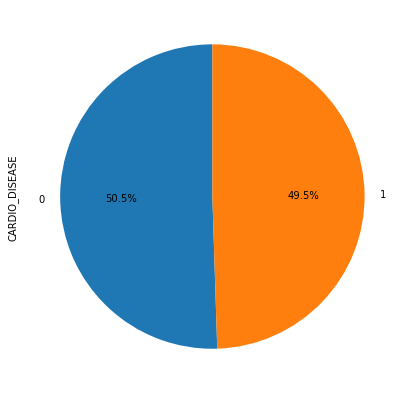

In [7]:
# Vizualizujeme si počet pacientov, ktorý trpeli kardiovaskulátnou chorobou
dataset.CARDIO_DISEASE.value_counts().plot(kind='pie', subplots=True, startangle=90, figsize=(10,7), autopct='%1.1f%%')

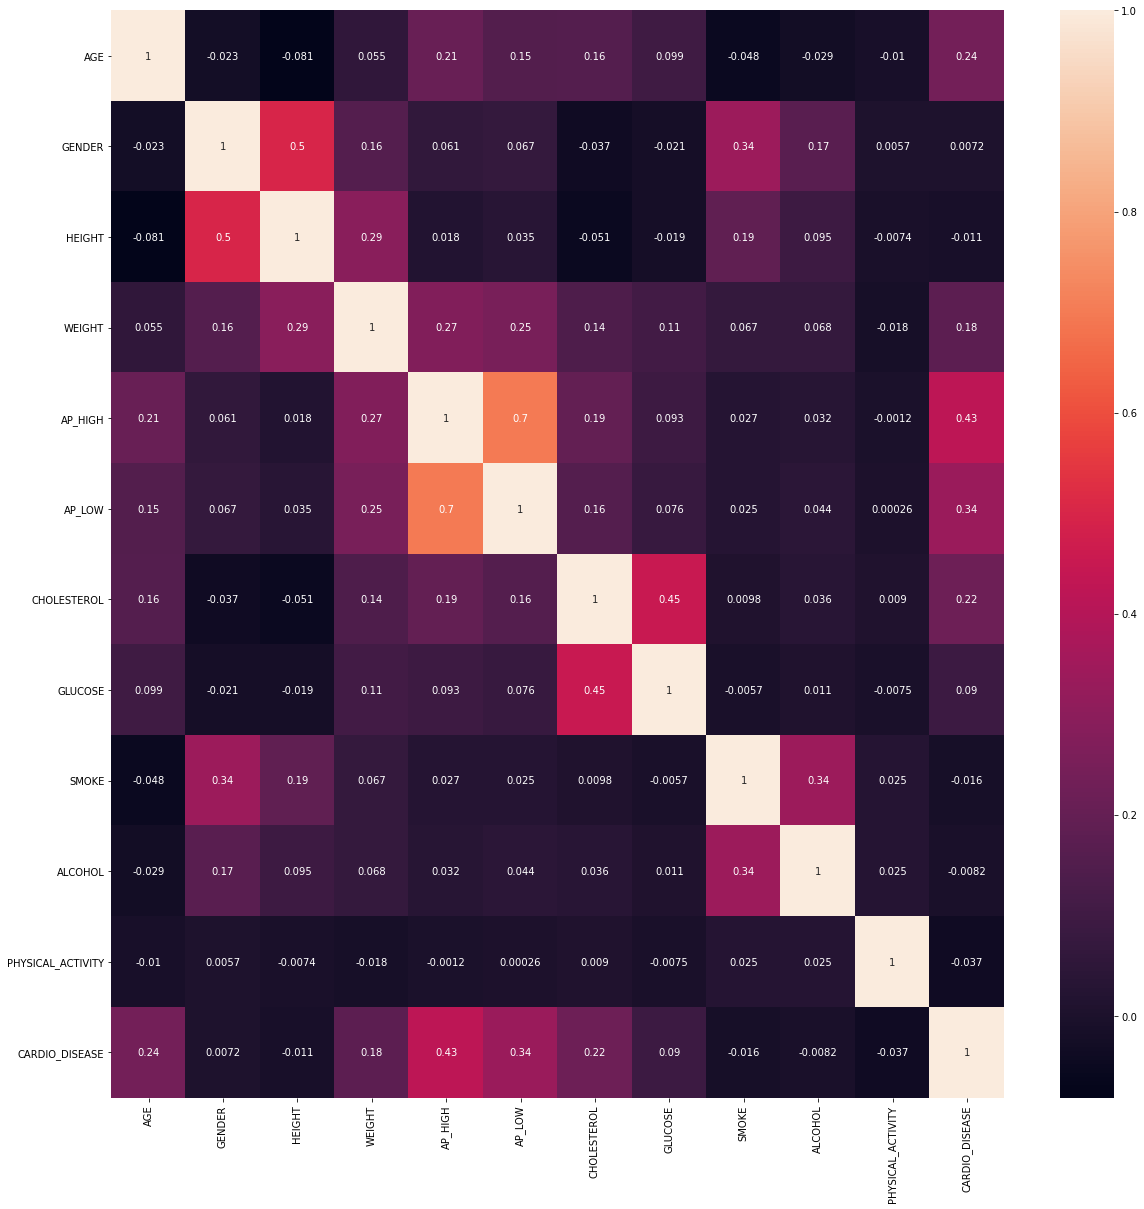

In [8]:
# fukncia corr() sa používa na nájdenie párovej korelácie všetkých stĺpcov v dataframe. Korelačná matica je dôležitá metrika 
# analýzy údajov, aby sa pochopil vzťah medzi rôznymi premennými. 
# Každý riadok a stĺpec predstavuje premennú a každá hodnota v tejto matici je korelačným koeficientom medzi premennými 
# predstavovanými príslušným riadkom a stĺpcom.
# ak je hodnota blízko +1 --> silný pozitívny vzťah medzi riadkom a stĺpcom (obe hodnoty sa menia rovnakým smerom)
# ak je hodnota blízko -1 --> silný negatívny vzťah medzi riadkom a stĺpcom (jedná hodnota stĺpa, druhá klesá)
# ak je hodnota blízko 0  --> znamená, že medzi riadkom a stĺpcom neni žiadny vzťah

corrMatrix = dataset.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corrMatrix, annot=True)
plt.show()

# Z grafu môžme vidieť, že stĺpec "CARDIO_DISEASE" najviac lineárne koreluje so stĺpcami "AGE", "WEIGHT", "AP_HIGH", "AP_LOW" 
# a "CHOLESTEROL", ktoré si môžme zvizualizovať

S kardiovaskulárnou chorobou ('CARDIO_DISEASE' == 1):


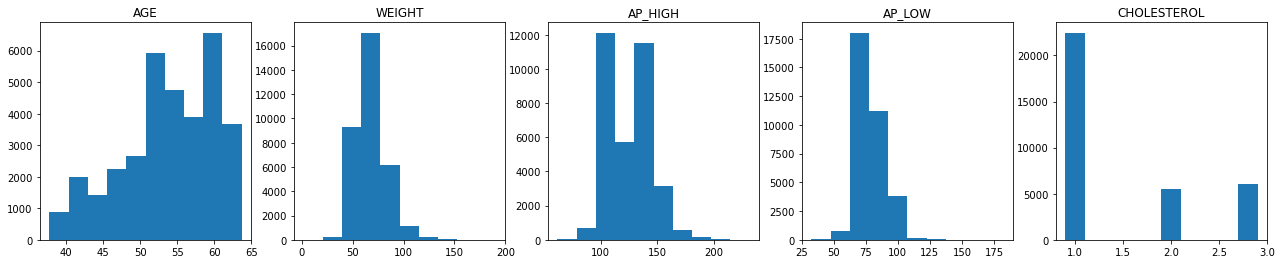

_______________________________________________________________________________________________________________________________

Bez kardiovaskulárnej choroby ('CARDIO_DISEASE' == 0):


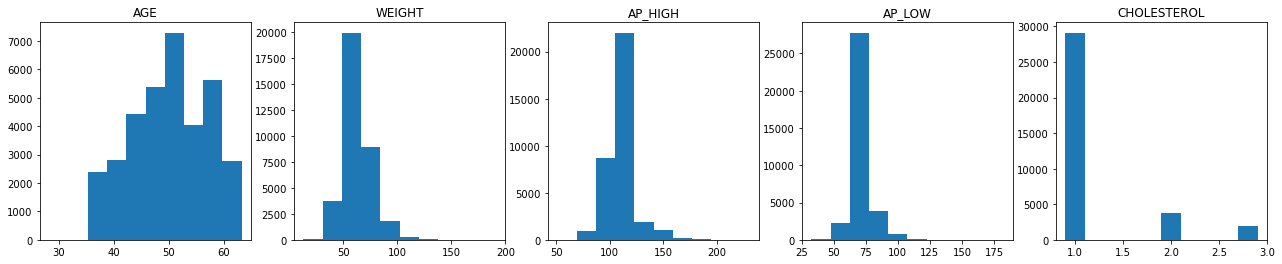

In [9]:
# Vizualizujeme stĺpce, ktoré mali najväčšiu lineránu koreláciu so stĺpcom "CARDIO_DISEASE", 
# konkrétne stĺpce AGE, WEIGHT, AP_HIGH, AP_LOW a CHOLESTEROL, z ktorých vytvoríme histogramy pre "CARDIO_DISEASE" == 0 a 1

print("S kardiovaskulárnou chorobou ('CARDIO_DISEASE' == 1):")
df = pd.DataFrame(dataset, columns= np.array(dataset.columns))
cardio = df.loc[(df.CARDIO_DISEASE == 1)]
fig, ax = plt.subplots(1,5,figsize=(22, 4))
i = 0
j = 0

columns = cardio.iloc[:,[0,3,4,5,6]]
for c in columns:
    ax[i].hist(cardio[c], align='left')
    ax[i].set_title(c)
    i = i + 1

        
fig.subplots_adjust(hspace=0.5, wspace=0.2)
plt.show()

print("_______________________________________________________________________________________________________________________________")
print()
print("Bez kardiovaskulárnej choroby ('CARDIO_DISEASE' == 0):")
df = pd.DataFrame(dataset, columns= np.array(dataset.columns))
cardio = df.loc[(df.CARDIO_DISEASE == 0)]
fig, ax = plt.subplots(1,5,figsize=(22, 4))
i = 0
j = 0

columns = cardio.iloc[:,[0,3,4,5,6]]
for c in columns:
    ax[i].hist(cardio[c], align='left')
    ax[i].set_title(c)
    i = i + 1

        
fig.subplots_adjust(hspace=0.5, wspace=0.2)
plt.show()

# z grafov môžme pozorovať, že pacienti, ktorý mali vyšší vek, váhu, vyšší krvný tlak a vyššiu hladinu choresterolu trpeli
# nejakou formou kardiovaskulárnej choroby

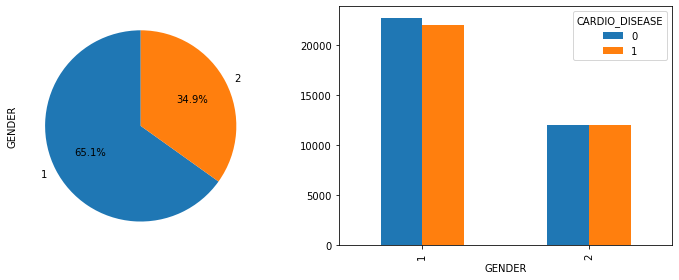

In [10]:
# Čo sa týka stĺpcov, ktorých linerána korelácia sa blížila 0, si môžme pre ukážku vizualizovať stĺpec "GENDER"
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))

dataset.GENDER.value_counts().plot(kind='pie', subplots=True,startangle=90, figsize=(12,7), autopct='%1.1f%%',ax=ax1)
pd.crosstab(dataset.GENDER, dataset.CARDIO_DISEASE).plot(kind = 'bar',ax=ax2)

plt.tight_layout()

# V dataset tvorili záznami prevažne o ženách (1), až 65,1%, muži(2) tvorili 34,9% vzorky.
# Druhý graf zobrazuje počet mužov a žien, ktorý trpeli nejakou formou kardiovaskulárnej choroby, z grafu môžme pozorovať, že
# počet žien/mužov, ktorý mali/nemali kardiovaskulárnu chorobu je približne rovnaký.

# Rovnaké výsledky by sme videli aj pri grafoch stĺpcov HEIGHT, GLUCOSE, SMOKE, ALCOHOL a PHYSICAL ACTIVITY
# Uvedené stĺpce nie su pre nás podstatné kvôli ich lineárnej korelácií blížiacej sa 0

In [11]:
y = dataset.iloc[:,11].values

In [12]:
x = dataset.iloc[:,[0,3,4,5,6]].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3) 

In [14]:
len(X_train)

55026

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
optimizer = keras.optimizers.Adam(lr=0.01)

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=5))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer=optimizer, metrics=['accuracy'])                 
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=9171, verbose=1)

Epoch 1/100
6/6 [==============================] - 1s 150ms/step - loss: 0.6737 - accuracy: 0.6017 - val_loss: 0.5756 - val_accuracy: 0.7180
Epoch 2/100
6/6 [==============================] - 0s 10ms/step - loss: 0.5702 - accuracy: 0.7194 - val_loss: 0.5698 - val_accuracy: 0.7254
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 0.5660 - accuracy: 0.7262 - val_loss: 0.5585 - val_accuracy: 0.7278
Epoch 4/100
6/6 [==============================] - 0s 10ms/step - loss: 0.5582 - accuracy: 0.7239 - val_loss: 0.5567 - val_accuracy: 0.7292
Epoch 5/100
6/6 [==============================] - 0s 9ms/step - loss: 0.5531 - accuracy: 0.7256 - val_loss: 0.5533 - val_accuracy: 0.7294
Epoch 6/100
6/6 [==============================] - 0s 10ms/step - loss: 0.5513 - accuracy: 0.7285 - val_loss: 0.5530 - val_accuracy: 0.7273
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 0.5493 - accuracy: 0.7297 - val_loss: 0.5512 - val_accuracy: 0.7297
Epoch 8/100
6/6 [=====

6/6 [==============================] - 0s 9ms/step - loss: 0.5406 - accuracy: 0.7346 - val_loss: 0.5476 - val_accuracy: 0.7301
Epoch 60/100
6/6 [==============================] - 0s 9ms/step - loss: 0.5403 - accuracy: 0.7348 - val_loss: 0.5473 - val_accuracy: 0.7302
Epoch 61/100
6/6 [==============================] - 0s 9ms/step - loss: 0.5426 - accuracy: 0.7324 - val_loss: 0.5475 - val_accuracy: 0.7296
Epoch 62/100
6/6 [==============================] - 0s 9ms/step - loss: 0.5436 - accuracy: 0.7303 - val_loss: 0.5482 - val_accuracy: 0.7288
Epoch 63/100
6/6 [==============================] - 0s 9ms/step - loss: 0.5413 - accuracy: 0.7350 - val_loss: 0.5475 - val_accuracy: 0.7306
Epoch 64/100
6/6 [==============================] - 0s 9ms/step - loss: 0.5436 - accuracy: 0.7316 - val_loss: 0.5476 - val_accuracy: 0.7294
Epoch 65/100
6/6 [==============================] - 0s 9ms/step - loss: 0.5420 - accuracy: 0.7334 - val_loss: 0.5476 - val_accuracy: 0.7306
Epoch 66/100
6/6 [===============

In [17]:
y_pred = model.predict(X_test)
score = model.evaluate(X_test, y_test,verbose=1)
print('validation loss:', str(round(score[0]*100,2))+"%")
print('validation accuracy:', str(round(score[1]*100,2))+"%")

430/430 [==============================] - 0s 548us/step - loss: 0.5477 - accuracy: 0.7291
validation loss: 54.77%
validation accuracy: 72.91%


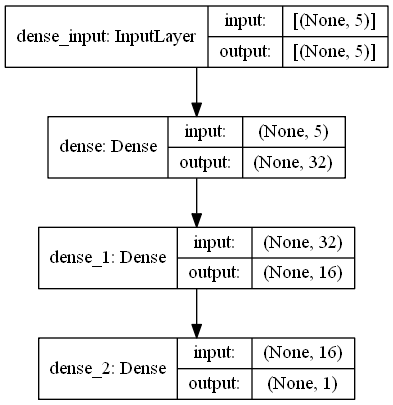

In [18]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [19]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


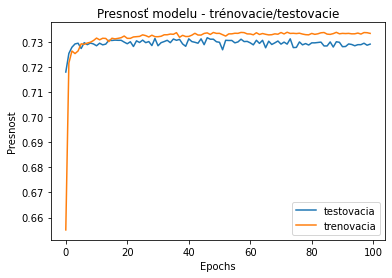

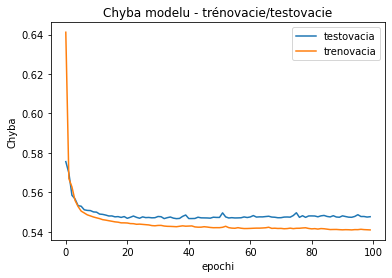

In [20]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Presnosť modelu - trénovacie/testovacie')
plt.ylabel('Presnost')
plt.xlabel('Epochs')
plt.legend(['testovacia', 'trenovacia'])
plt.show()

plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Chyba modelu - trénovacie/testovacie')
plt.ylabel('Chyba')
plt.xlabel('epochi')
plt.legend(['testovacia', 'trenovacia'])
plt.show()

In [27]:
def predikcia_vstupu(AGE, WEIGHT, AP_HIGH, AP_LOW, CHOLESTEROL):
    predict = pd.DataFrame({'AGE':int(AGE), 
                            'WEIGHT':int(WEIGHT),
                            'AP_HIGH':int(AP_HIGH), 
                            'AP_LOW':int(AP_LOW),
                            'CHOLESTEROL':int(CHOLESTEROL)}, index=[0]) 
                            
    X = scaler.transform(predict)
    prediction = model.predict_classes(X)
    score_percents = str(round(score[1]*100,2))+"%"
    if(prediction[0]==0):
        return "Pacient nemá nábeh na kardiovaskulárnu chorobu s " + score_percents + " pravdepodovnosťou."
    else:
        return "Pacient má so " + score_percents + " pravdepodovnosťou nábeh na kardiovaskulárnu chorobu"

In [28]:
AGE = input("Vek: ")
WEIGHT = input("Váha: ")
AP_HIGH = input("AP_HIGH: ")
AP_LOW = input("AP_LOW: ")
CHOLESTEROL = input("CHOLESTEROL: ")
predikcia_vstupu(AGE, WEIGHT, AP_HIGH, AP_LOW,CHOLESTEROL)

Vek: 30
Váha: 70
AP_HIGH: 120
AP_LOW: 80
CHOLESTEROL: 1


D:\Software\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'Pacient nemá nábeh na kardiovaskulárnu chorobu s 72.91% pravdepodovnosťou.'